In [7]:
from hdfs import InsecureClient

In [8]:
client = InsecureClient('http://localhost:9870', user='didi')
client.upload('/hadoop/data', "/smester7/Big Data/UAS/Data Supply chain/DataCoSupplyChainDataset.csv")

'/hadoop/data'

In [58]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("HDFSExample").getOrCreate()
df = spark.read.csv("file:///C:/smester7/Big Data/UAS/Data Supply chain/DataCoSupplyChainDataset.csv", encoding="ISO-8859-1", header=True, inferSchema=True)
df.show()

+--------+------------------------+-----------------------------+-----------------+------------------+-----------------+------------------+-----------+--------------+--------------+----------------+--------------+--------------+-----------+--------------+-----------------+----------------+--------------+--------------------+----------------+-------------+---------------+-----------+------------+------------+----------+-------------+-----------------+-----------------------+--------+----------------------+-------------------+------------------------+-------------+------------------------+-----------------------+-------------------+------+----------------+----------------------+--------------+--------------------+---------------+-------------+---------------+-------------------+-------------------+--------------------+------------+-------------+--------------+--------------------------+--------------+
|    Type|Days for shipping (real)|Days for shipment (scheduled)|Benefit per order|Sale

In [116]:
import pandas
df = pandas.read_csv("C:/smester7/Big Data/UAS/Data Supply chain/DataCoSupplyChainDataset.csv", encoding="ISO-8859-1")

In [118]:
# import library yang dibutuhkan project
import pandas as pd #library untuk operasi tabel
import numpy as np # untuk melqkukan aljabar linier
import math #untuk melakukan operasi matematika

import seaborn as sns #untuk melakukan plotting

#untuk menangani file
import os 
import sys 

#untuk praproses data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


#untuk membangun dan melatih model
from sklearn.ensemble import RandomForestClassifier
from prophet import Prophet



#untuk melaakukan evaluasi dan tuning model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#library untuk visualisasi
import matplotlib.pyplot as plt #untuk melakukan plotting
import squarify #untuk membuat dan menampilkan tree map

In [120]:
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class


In [122]:
# lihat jumlah baris dan kolom
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [126]:
# drop kolom yang tidak relevan
def drop_columns(df, columns_to_drop):
    try:
        df = df.drop(columns=columns_to_drop)
        print(f"{len(columns_to_drop)} columns dropped successfully. Number of columns remaining: {len(df.columns)}")
        return df
    except KeyError as e:
        print(f"""Column(s): {e} not found in dataframe.
              
            No columns dropped.
            Please Check that the column names are correct.""")
        return df

# daftar kolom yang akan digunakan
colums_to_keep = ['Days for shipping (real)', 
                  'Days for shipment (scheduled)',
                  'Customer Country',
                  'Sales per customer',
                  'Delivery Status', 
                  'Late_delivery_risk', 
                  'Customer City',
                  'Customer Segment',
                  'Sales','Shipping Mode',
                  'Type', 'Product Card Id', 
                  'Product Category Id', 
                  'Product Name',                    
                  'Product Price',
                  'Market', 
                  'Product Status',
                  'shipping date (DateOrders)',]

# kolom yang akan di drop adalah kolom selain kolom di atas
columns_to_drop = [col for col in df.columns if col not in colums_to_keep ]

# drop kolom yang tidak dibutuhkan
df = drop_columns(df, columns_to_drop)

df.describe()

35 columns dropped successfully. Number of columns remaining: 18


,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Late_delivery_risk,Sales,Product Card Id,Product Category Id,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.0
mean,3.497654,2.931847,183.107609,0.548291,203.772096,692.509764,31.851451,141.232550,0.0
std,1.623722,1.374449,120.043670,0.497664,132.273077,336.446807,15.640064,139.732492,0.0
min,0.000000,0.000000,7.490000,0.000000,9.990000,19.000000,2.000000,9.990000,0.0
25%,2.000000,2.000000,104.379997,0.000000,119.980003,403.000000,18.000000,50.000000,0.0
50%,3.000000,4.000000,163.990005,1.000000,199.919998,627.000000,29.000000,59.990002,0.0
75%,5.000000,4.000000,247.399994,1.000000,299.950012,1004.000000,45.000000,199.990005,0.0
max,6.000000,4.000000,1939.989990,1.000000,1999.989990,1363.000000,76.000000,1999.989990,0.0


In [128]:
### fungsi untuk mengecek missing value
def check_null_values(df):
    null_values = df.isnull().sum()
    if null_values.sum() == 0:
        print("No null values found ✅")
    else:
        print("⚠️ Null values found in the following columns:")
        for column, null_count in null_values.iteritems():
            if null_count > 0:
                print(f"{column}: {null_count}")

# gunakan fungsi di atas
check_null_values(df)

No null values found ✅


In [130]:
# buat kolom month, year, day, dan weekday dari kolom shipping date
def extract_date_parts(df, date_column, prefix):
    try:
        df[date_column] = pd.to_datetime(df[date_column])
        df[f'{prefix} Year'] = df[date_column].dt.year
        df[f'{prefix} Month'] = df[date_column].dt.month
        df[f'{prefix} Day'] = df[date_column].dt.day
        df[f'{prefix} Weekday'] = df[date_column].dt.weekday
        # verify and notify that the columns have been created
        if f'{prefix} Year' in df.columns and f'{prefix} Month' in df.columns and f'{prefix} Day' in df.columns and f'{prefix} Weekday' in df.columns:
            print(f"✅ Success! Columns Created: {prefix} Year, {prefix} Month, {prefix} Day, and {prefix} Weekday")
            return df
        else:
            print("Error creating columns. Please check that the date column name is correct.")
    except Exception as e:
        print(f"Error creating columns: {e}")
        return df
# buat kolom lead time dari pengurangan kolom days for shipping real dan scheduled
df['Lead Time'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']

# gunakan fungsi di atas untuk membuat kolom month, year, day, dan weekday
df = extract_date_parts(df, 'shipping date (DateOrders)', 'Shipping')

✅ Success! Columns Created: Shipping Year, Shipping Month, Shipping Day, and Shipping Weekday


In [132]:
# display the shape of the data frame
df.shape

(180519, 23)

In [134]:
# pilih produk yang paling banyak terjual
top_product = df['Product Card Id'].value_counts().index[0]
# tampilkan id produk yang paling banyak dijual
print(f"Filtering and Encoding Dataset for Top Product ID: {top_product}")

from sklearn.preprocessing import LabelEncoder

def prepare_data(df, product_card_id, categorical_cols, columns_to_drop):
    try:
        df_copy = df[df['Product Card Id'] == product_card_id].copy()  # create a copy

        # lakukan label encoding
        label_encoder = LabelEncoder()
        df_label_encoded = df_copy.copy()

        # terapkan label encoding pada variabel kategori
        for col in categorical_cols:
            df_label_encoded[col] = label_encoder.fit_transform(df_label_encoded[col])

        # drop kolom yang tidak relevan
        df_label_encoded = df_label_encoded.drop(columns=columns_to_drop)

        # lakukan one-hot encoding
        df_one_hot_encoded = pd.get_dummies(df_copy, columns=categorical_cols)

        # drop kolom hasil onehot yang tidak relevan
        df_one_hot_encoded = df_one_hot_encoded.drop(columns=columns_to_drop)
        print("Data Encoding successful. ✅")
        return  df_one_hot_encoded, df_label_encoded
    except Exception as e:
        print(f"Error preparing data: {e}")
        return None, None

# gunakan fungsi di atas untuk melakukan analisis bivariat
categorical_cols = ['Type', 'Customer Segment', 
                    'Delivery Status', 
                    'Customer City', 
                    'Market',
                    'Shipping Mode']

columns_to_drop = ['Product Name',
                   'Days for shipment (scheduled)', 
                   'Sales per customer', 
                   'Days for shipping (real)',
                   'Customer Country', 
                   'shipping date (DateOrders)', 
                   'Product Card Id', 
                   'Product Category Id', 
                   'Product Status', 
                   'Product Price']

# drop kolom yang tidak relevan dan lakukan data encoding untuk membuat correlation matrix dan untuk melakukan machine learning
onehot_encode_df, label_encode_df = prepare_data(df, top_product, categorical_cols, columns_to_drop)

# ganti nama kolom type jadi payment type
label_encode_df = label_encode_df.rename(columns={'Type': 'Payment Type'})
onehot_encode_df = onehot_encode_df.rename(columns={'Type': 'Payment Type'})

Filtering and Encoding Dataset for Top Product ID: 365
Data Encoding successful. ✅


In [136]:
label_encode_df.dtypes

Payment Type            int32
Delivery Status         int32
Late_delivery_risk      int64
Customer City           int32
Customer Segment        int32
Market                  int32
Sales                 float64
Shipping Mode           int32
Lead Time               int64
Shipping Year           int32
Shipping Month          int32
Shipping Day            int32
Shipping Weekday        int32
dtype: object

In [188]:
label_encode_df.head()

,Payment Type,Delivery Status,Late_delivery_risk,Customer City,Customer Segment,Market,Sales,Shipping Mode,Lead Time,Shipping Year,Shipping Month,Shipping Day,Shipping Weekday
48,2,1,1,32,2,3,119.980003,2,3,2016,2,29,0
57,2,1,1,65,2,4,119.980003,2,4,2016,4,19,1
58,2,1,1,65,2,4,119.980003,2,2,2016,5,26,3
66,2,1,1,65,2,1,179.970001,2,2,2015,9,26,5
67,2,3,0,65,2,1,179.970001,2,0,2017,7,4,1


In [138]:
# validate the one-hot encoding
onehot_encode_df.dtypes

Late_delivery_risk                int64
Sales                           float64
Lead Time                         int64
Shipping Year                     int32
Shipping Month                    int32
                                 ...   
Market_USCA                        bool
Shipping Mode_First Class          bool
Shipping Mode_Same Day             bool
Shipping Mode_Second Class         bool
Shipping Mode_Standard Class       bool
Length: 589, dtype: object

In [190]:
onehot_encode_df.head()

,Late_delivery_risk,Sales,Lead Time,Shipping Year,Shipping Month,Shipping Day,Shipping Weekday,Type_CASH,Type_DEBIT,Type_PAYMENT,...,Customer City_Zanesville,Market_Africa,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
48,1,119.980003,3,2016,2,29,0,False,False,True,...,False,False,False,False,True,False,False,False,True,False
57,1,119.980003,4,2016,4,19,1,False,False,True,...,False,False,False,False,False,True,False,False,True,False
58,1,119.980003,2,2016,5,26,3,False,False,True,...,False,False,False,False,False,True,False,False,True,False
66,1,179.970001,2,2015,9,26,5,False,False,True,...,False,False,True,False,False,False,False,False,True,False
67,0,179.970001,0,2017,7,4,1,False,False,True,...,False,False,True,False,False,False,False,False,True,False


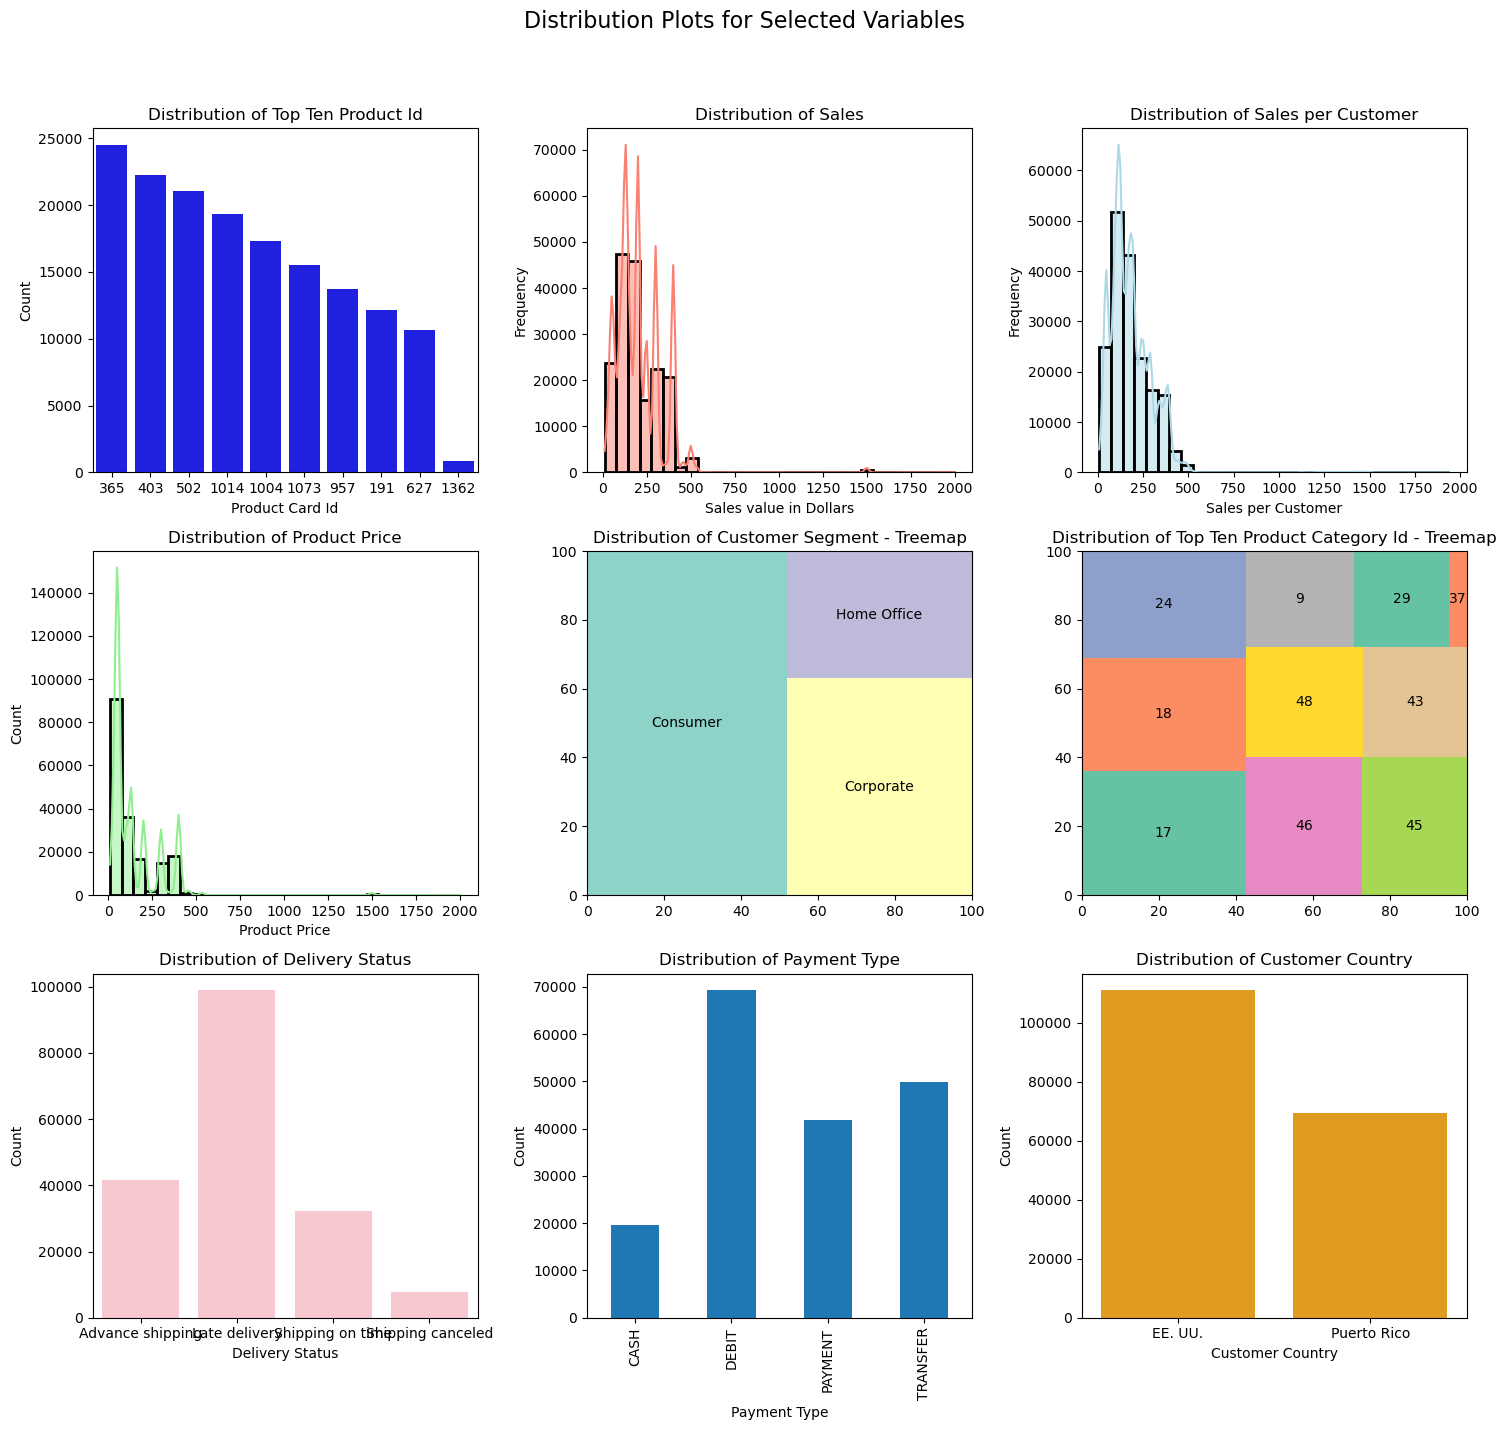

In [140]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Distribution Plots for Selected Variables', 
             fontsize=16)
# Create a copy of the DataFrame
df_copy = df.copy()


# Plotting  the top ten products per Product Card Id
sns.countplot(data=df_copy, x='Product Card Id',
                color='blue', ax=axes[0, 0], 
                order=df_copy['Product Card Id'].value_counts().iloc[:10].index)
axes[0, 0].set_title('Distribution of Top Ten Product Id')
axes[0, 0].set_xlabel('Product Card Id')
axes[0, 0].set_ylabel('Count')


# Plotting Value of sales in  dollars
sns.histplot(data=df_copy, x='Sales', 
             kde=True, color='salmon', 
             bins=30, linewidth=2,
             ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Sales')
axes[0, 1].set_xlabel('Sales value in Dollars')
axes[0, 1].set_ylabel('Frequency')


# Plotting Sales Value per customer
sns.histplot(data=df_copy, x='Sales per customer',
             bins=30, kde=True, linewidth=2,
             color='lightblue', ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Sales per Customer')
axes[0, 2].set_xlabel('Sales per Customer')
axes[0, 2].set_ylabel('Frequency')

# Ploting the distribution of Product Price
sns.histplot(data=df_copy, x='Product Price', bins=30, kde=True, 
             color='lightgreen', linewidth=2, ax=axes[1, 0])

axes[1, 0].set_title('Distribution of Product Price')
axes[1, 0].set_xlabel('Product Price')

# ploting a tree map for Customer Segment
squarify.plot(sizes=df_copy['Customer Segment'].value_counts(), 
              label=df_copy['Customer Segment'].value_counts().index, 
              color=sns.color_palette("Set3"), ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Customer Segment - Treemap')

# ploting a tree map for Top Ten Product Category Id
squarify.plot(sizes=df_copy['Product Category Id'].value_counts().iloc[:10],
                label=df_copy['Product Category Id'].value_counts().iloc[:10].index,
                color=sns.color_palette("Set2"), ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Top Ten Product Category Id - Treemap')

# Plotting the distribution of Delivery Status
sns.countplot(data=df_copy, x='Delivery Status',
                color='pink', ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Delivery Status')
axes[2, 0].set_xlabel('Delivery Status')
axes[2, 0].set_ylabel('Count')


# Plotting the distribution Payment Type with stacked bar chart
df_copy.groupby(['Type'])['Type'].count().plot(kind='bar', 
                                               stacked=True,
                                               ax=axes[2, 1])

axes[2, 1].set_title('Distribution of Payment Type')
axes[2, 1].set_xlabel('Payment Type')
axes[2, 1].set_ylabel('Count')

# Plotting the Distribution of top ten Customer Country
sns.countplot(data=df_copy, x='Customer Country',
                color='orange', ax=axes[2, 2], 
                order=df_copy['Customer Country'].value_counts().iloc[:10].index)
axes[2, 2].set_title('Distribution of Customer Country')
axes[2, 2].set_xlabel('Customer Country')
axes[2, 2].set_ylabel('Count')



# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Show the plots
plt.show()

In [176]:
plt.savefig('grafik_saya.png', dpi=300)

<Figure size 640x480 with 0 Axes>

C:\Users\didi\AppData\Local\Temp\ipykernel_1256\1033353534.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_df = df_heatmap.resample('M').sum()  # Resample to yearly frequency


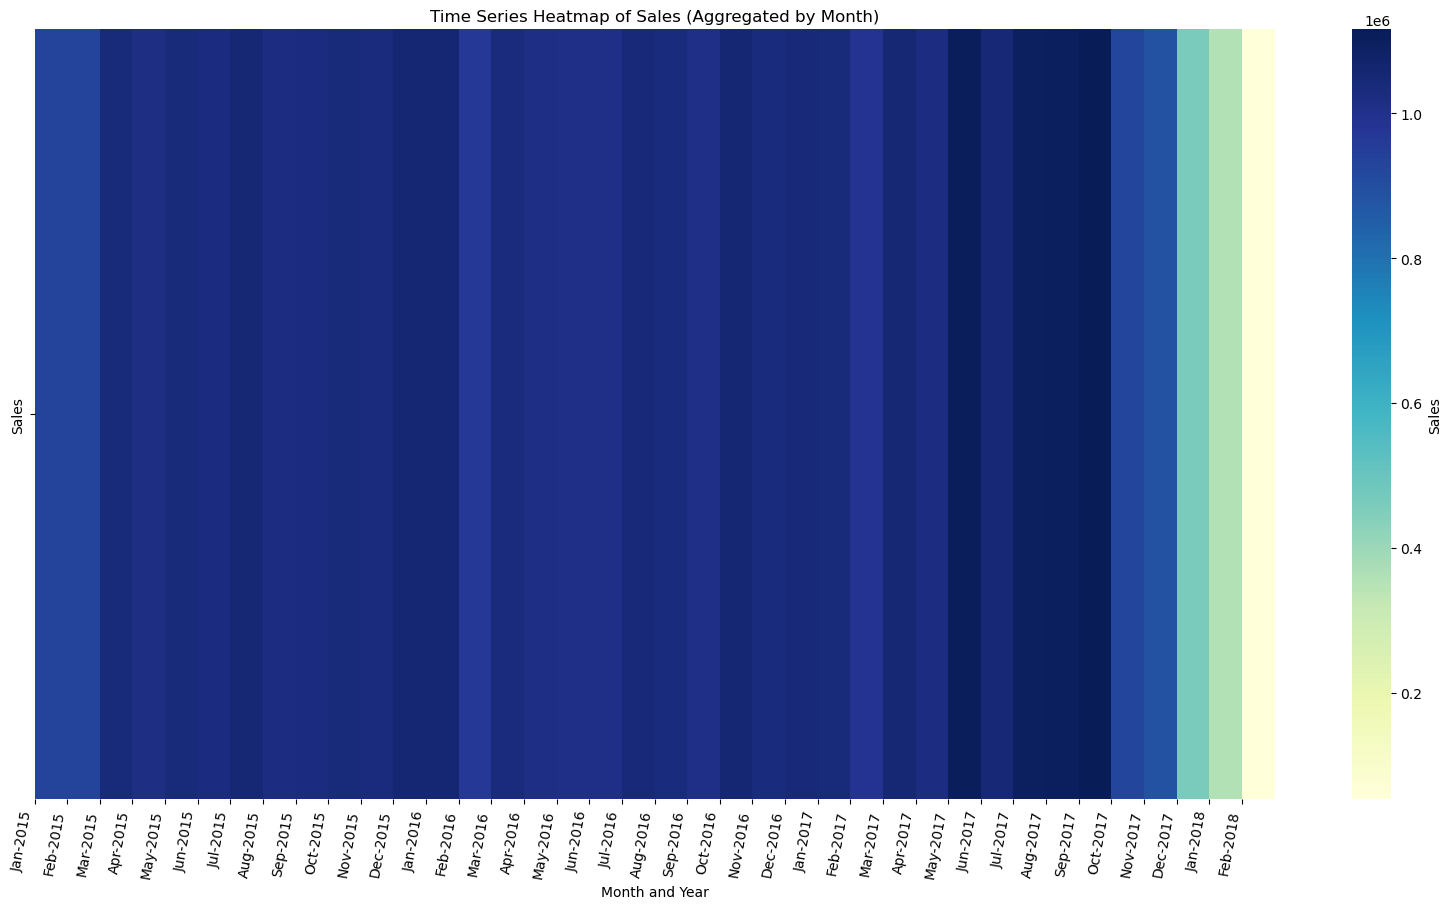

In [142]:
#| code-fold: true
#| code-summary: "Show the code"	
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

# Extract shipping date (DateOrders) and Sales columns
df_heatmap = df[['shipping date (DateOrders)', 'Sales']]
# Assuming 'df' is your original dataframe

df_heatmap.set_index('shipping date (DateOrders)', inplace=True)
resampled_df = df_heatmap.resample('M').sum()  # Resample to yearly frequency
# Set x-axis ticks to represent months and years
month_labels = [calendar.month_abbr[m.month] + '-' + str(m.year) for m in resampled_df.index]
# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(resampled_df.T, cmap='YlGnBu', cbar_kws={'label': 'Sales'})
plt.xticks(ticks=range(len(month_labels)), labels=month_labels, rotation=80, ha='right')

plt.title('Time Series Heatmap of Sales (Aggregated by Month)')
plt.xlabel('Month and Year')


plt.show()

In [152]:
# import prophet
from prophet import Prophet

prophet_df = df.copy()
prophet_df = prophet_df.rename(columns={'shipping date (DateOrders)': 'ds', 'Sales': 'y'})

# Create a Prophet instance and provide the holidays DataFrame
prophet = Prophet()

prophet.fit(prophet_df)

# Create a DataFrame with future dates for forecasting
future = prophet.make_future_dataframe(periods=365, freq='D')

# Generate forecasts
forecast = prophet.predict(future) 

07:22:12 - cmdstanpy - INFO - Chain [1] start processing
07:26:39 - cmdstanpy - INFO - Chain [1] done processing


In [164]:
from prophet.diagnostics import cross_validation, performance_metrics, plot_cross_validation_metric

# Perform cross-validation
df_cv = cross_validation(model=prophet, initial='730 days', period='365 days', horizon='365 days')

ImportError: cannot import name 'plot_cross_validation_metric' from 'prophet.diagnostics' (C:\Users\didi\anaconda3\Lib\site-packages\prophet\diagnostics.py)

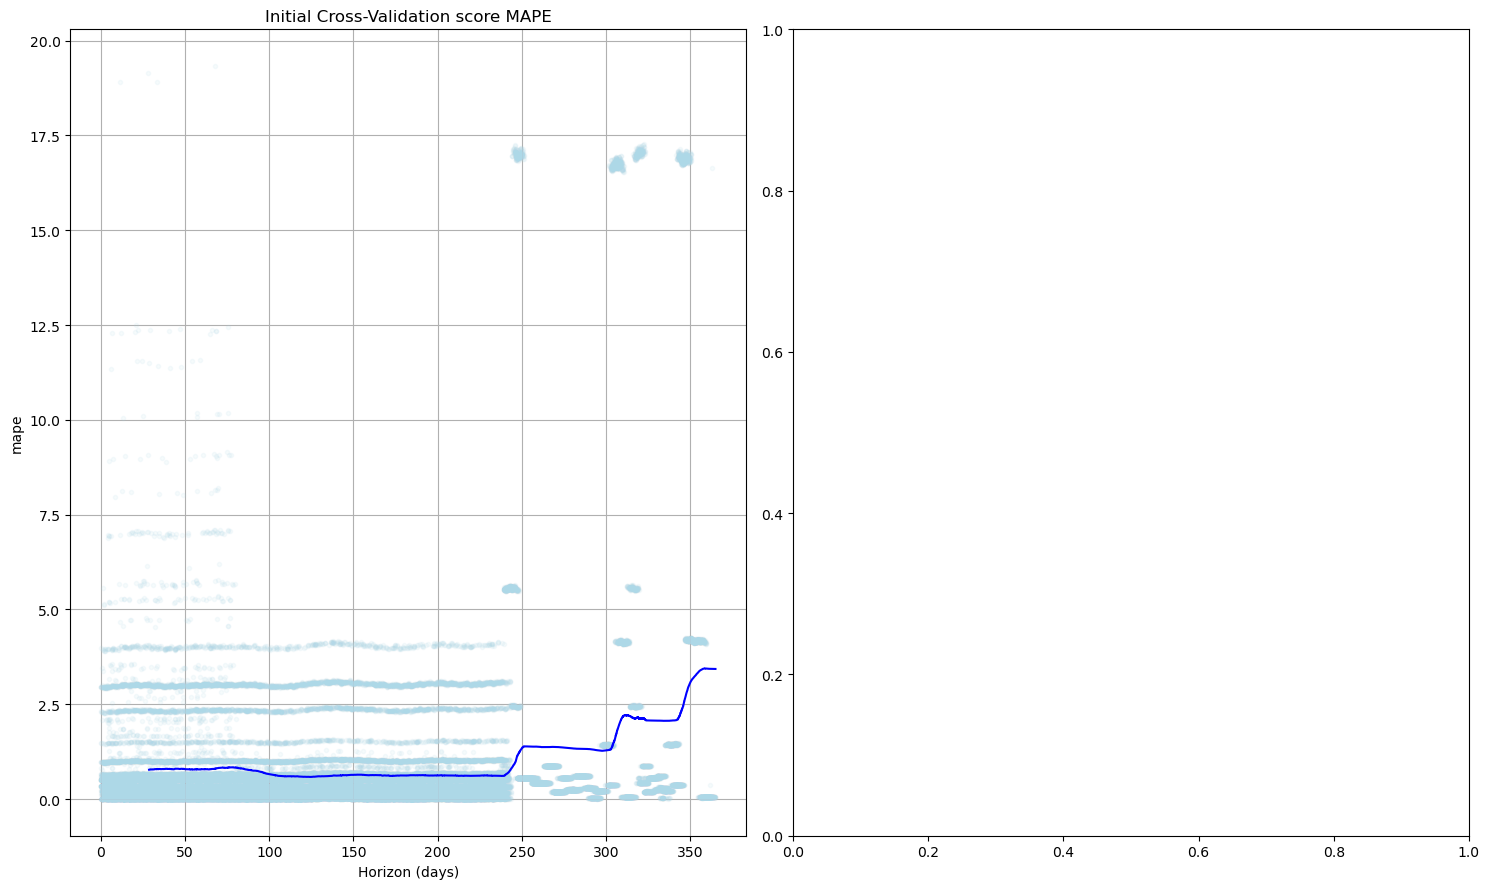

In [200]:
from prophet.diagnostics import cross_validation, performance_metrics
fig, axs = plt.subplots(1, 2, figsize=(15, 9))
from prophet.plot import plot_cross_validation_metric

# Plot the first cross-validation metric
fig1 = plot_cross_validation_metric(df_cv, metric='mape', ax=axs[0])
fig1.get_axes()[0].get_lines()[0].set_markerfacecolor('#ADD8E7')  # Change color of the dots
fig1.get_axes()[0].get_lines()[0].set_markeredgecolor('#ADD8E7')  # Change color of the dot edges
# add title
axs[0].set_title('Initial Cross-Validation score MAPE')

plt.tight_layout()
plt.show()

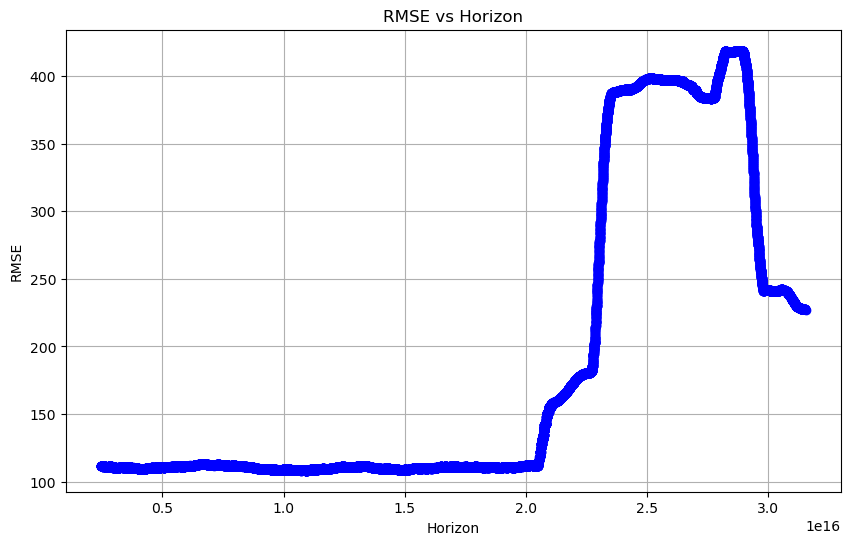

In [206]:
# Menghitung metrik performa
df_p = performance_metrics(df_cv)

# Plot RMSE atau metrik lainnya terhadap horizon
plt.figure(figsize=(10, 6))
plt.plot(df_p['horizon'], df_p['rmse'], marker='o', linestyle='-', color='b')
plt.xlabel('Horizon')
plt.ylabel('RMSE')
plt.title('RMSE vs Horizon')
plt.grid(True)
plt.show()

In [168]:
forecast.show()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-03 00:00:00,147.122664,46.113896,373.772902,147.122664,147.122664,65.261767,65.261767,65.261767,-1.017651,...,-1.282643,-1.282643,-1.282643,67.562060,67.562060,67.562060,0.0,0.0,0.0,212.384430
1,2015-01-03 03:30:00,147.437806,50.263769,363.602499,147.437806,147.437806,65.469246,65.469246,65.469246,-0.409148,...,-1.389586,-1.389586,-1.389586,67.267979,67.267979,67.267979,0.0,0.0,0.0,212.907052


In [186]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
64061,2019-02-02 22:14:00,-54.078409,-1863.028927,2009.334888,-1861.063672,2038.060386,-23.031965,-23.031965,-23.031965,-0.39853,...,-0.506546,-0.506546,-0.506546,-22.126888,-22.126888,-22.126888,0.0,0.0,0.0,-77.110374
64062,2019-02-03 22:14:00,-54.632005,-1874.668266,2032.477700,-1866.536627,2045.165274,-22.545064,-22.545064,-22.545064,-0.39853,...,0.458387,0.458387,0.458387,-22.604920,-22.604920,-22.604920,0.0,0.0,0.0,-77.177068
64063,2019-02-04 22:14:00,-55.185600,-1907.730524,2078.512788,-1872.009581,2055.604181,-22.972582,-22.972582,-22.972582,-0.39853,...,0.466382,0.466382,0.466382,-23.040434,-23.040434,-23.040434,0.0,0.0,0.0,-78.158182
64064,2019-02-05 22:14:00,-55.739195,-1915.585353,2057.202967,-1877.482535,2067.003908,-22.970191,-22.970191,-22.970191,-0.39853,...,0.897829,0.897829,0.897829,-23.469490,-23.469490,-23.469490,0.0,0.0,0.0,-78.709386
64065,2019-02-06 22:14:00,-56.292790,-1881.263236,2076.043179,-1891.188322,2080.066040,-24.587159,-24.587159,-24.587159,-0.39853,...,-0.261670,-0.261670,-0.261670,-23.926958,-23.926958,-23.926958,0.0,0.0,0.0,-80.879949


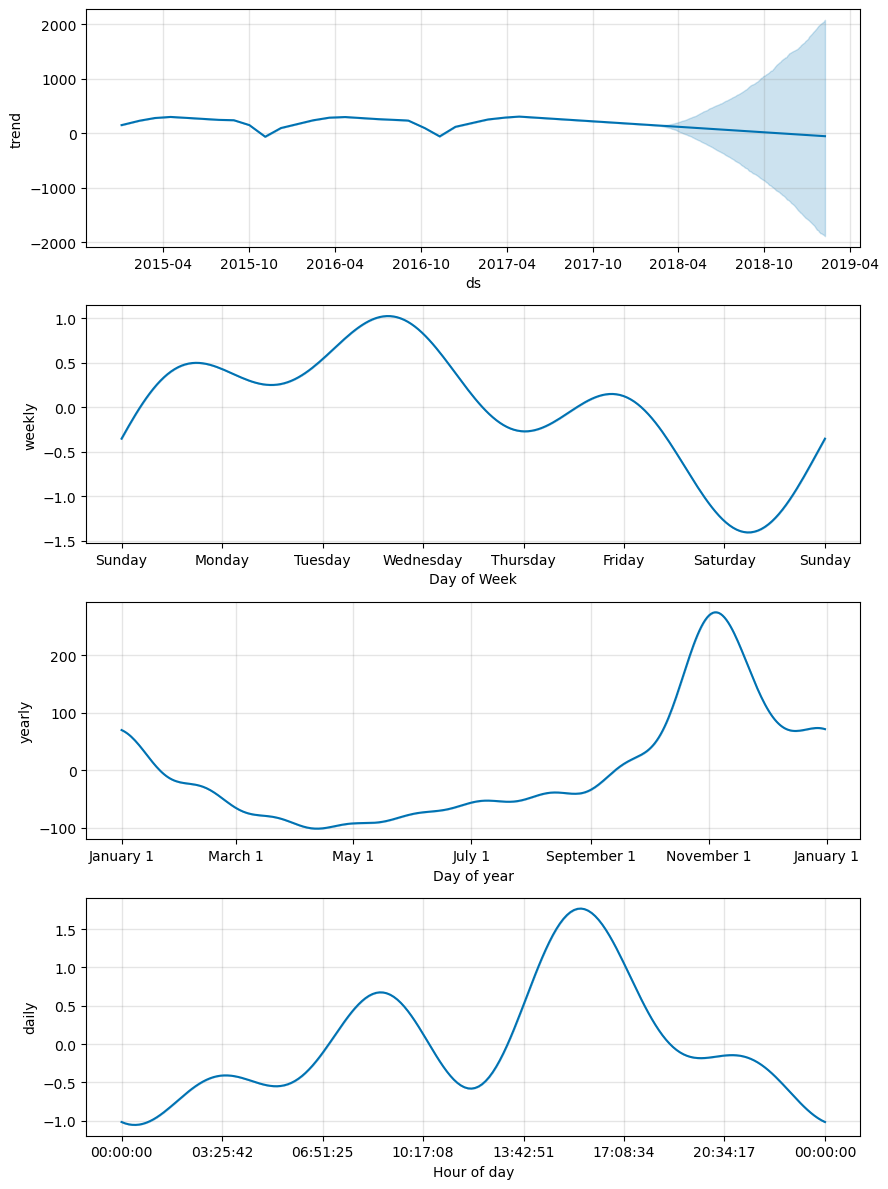

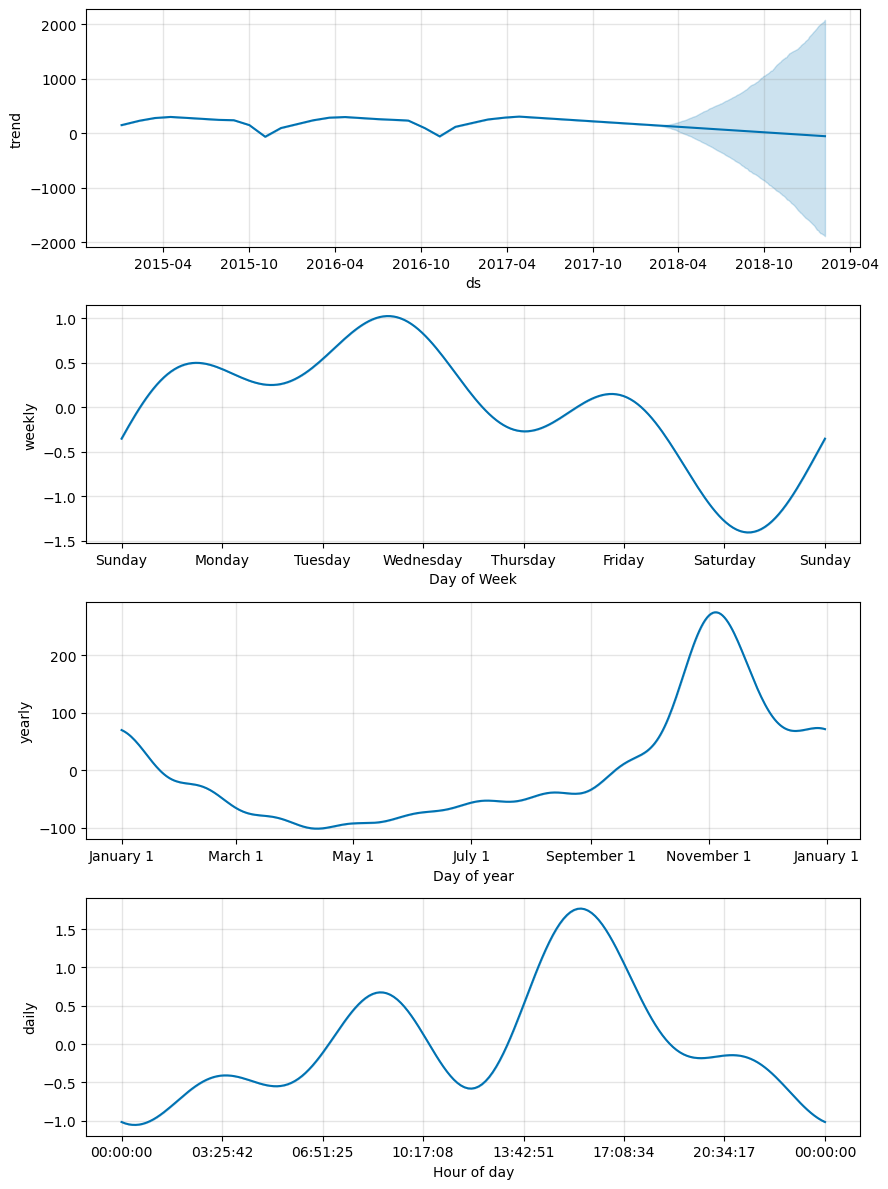

In [174]:
import warnings

# Ignore the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Plot the forecast
prophet.plot_components(forecast)